<a href="https://colab.research.google.com/github/xsuryanshx/YOLOv4-classification/blob/main/YOLOv4_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
# this is where my datasets are stored within my Google Drive (I created a yolov4 folder to store all important files for custom training) 
!ls /mydrive/yolov4/  

In [ ]:
# copy the dataset into the root directory of the Colab VM
!cp -r /mydrive/yolov4/obj/ -d data/

In [ ]:
# download cfg to google drive
!cp cfg/yolov4-custom.cfg mydrive/yolov4/yolov4-obj.cfg

In [ ]:
'''
Now you need to edit the .cfg to fit your needs based on your object detector. Open it up in a code or text editor to do so.

If you downloaded cfg to google drive you can use the built in Text Editor by going to your google drive and double clicking on yolov4-obj.cfg
and then clicking on the Open with drop down and selecting Text Editor.

How to Configure Your Variables:

width = 416

height = 416 (these can be any multiple of 32, 416 is standard, you can sometimes improve results by making value larger like 608 but will 
slow down training)

max_batches = (no. of classes) * 2000 (but no less than 6000 so if you are training for 1, 2, or 3 classes it will be 6000, however detector 
for 5 classes would have max_batches=10000)

steps = (80% of max_batches), (90% of max_batches) (so if your max_batches = 10000, then steps = 8000, 9000)

filters = (no. of classes + 5) * 3 (so if you are training for one class then your filters = 18, but if you are training for 4 classes 
then your filters = 27)
'''

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov4/yolov4-obj.cfg ./cfg

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov4/obj.names ./data
!cp /mydrive/yolov4/obj.data  ./data

In [ ]:
# upload the generate_train.py and generate_test.py script to cloud VM from Google Drive
!cp /mydrive/yolov4/generate_train.py ./

In [ ]:
# Now simply run both scripts to do the work for you of generating the two txt files.
!python generate_train.py

In [ ]:
# verify that the newly generated train.txt can be seen in our darknet/data folder
!ls data/

In [ ]:
'''
Next step downloads the weights for the convolutional layers of the YOLOv4 network. By using these weights 
it helps your custom object detector to be way more accurate and not have to train as long. You don't have to use 
these weights but trust me it will help your model converge and be accurate way faster.
'''

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [ ]:
'''
Now we are ready to train the model

TIP: This training could take several hours depending on how many iterations you chose in the .cfg file. 
You will want to let this run as you sleep or go to work for the day, etc. However, Colab Cloud Service kicks you off 
it's VMs if you are idle for too long (30-90 mins).

To avoid this hold (CTRL + SHIFT + i) at the same time to open up the inspector view on your browser.

Paste the following code into your console window and hit Enter

function ClickConnect(){
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect,60000)

'''

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture

!./darknet detector train data/obj.data cfg/yolov4-obj.cfg yolov4.conv.137 -dont_show 

In [ ]:
'''
TRICK: If for some reason you get an error or your Colab goes idle during training, you have not lost your partially 
trained model and weights! Every 100 iterations a weights file called yolov4-obj_last.weights is saved to 
mydrive/yolov4/backup/ folder (wherever your backup folder is). This is why we created this folder in our Google drive 
and not on the cloud VM. If your runtime crashes and your backup folder was in your cloud VM you would lose your weights 
and your training progress.

We can kick off tra----ining from our last saved weights file so that we don't have to restart!  
Just run the following command but with your backup location.
'''

In [ ]:
# kick off training from where it last saved
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights -dont_show

Final Value of Loss @ 3000 epoch

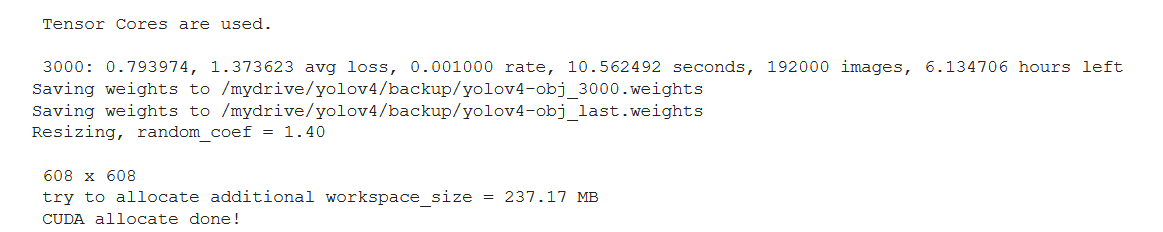

## Test the model on images

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x

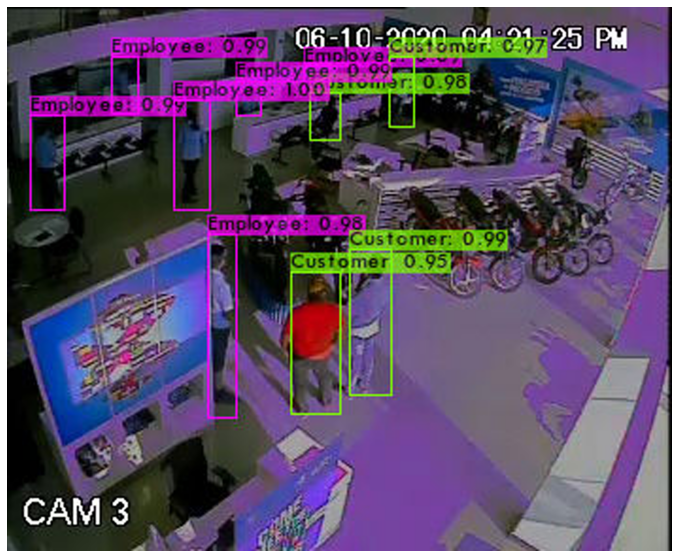

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights /mydrive/yolov4/obj/14600.jpg -thresh 0.3 -dont_show
imShow('predictions.jpg')

#Video Testing

In [ ]:
# try out the upload helper function! (I uploaded an image called highway.jpg, upload whatever you want!)
%cd ..
upload()
%cd darknet

/


/darknet


In [ ]:
!./darknet detector demo data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights -dont_show /mydrive/Bajaj_3_3.mp4 -i 0 -out_filename /mydrive/unseen_data.avi

In [ ]:
download('/mydrive/unseen_data.avi') #to download the classification output video

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>